In [5]:
import numpy as np
import MDAnalysis
import MDAnalysis.analysis.leaflet
import MDAnalysis.analysis.rms
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA

In [90]:
from matplotlib import rc, rcParams

rcParams['axes.labelsize'] = 24
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['svg.fonttype'] = 'none'
rcParams['text.usetex'] = False

In [22]:
def dis (sel1, sel2, x) :
	res_i = x.select_atoms(sel1 + ' and name CA').positions
	res_j = x.select_atoms(sel2 + ' and name CA').positions
	dis = np.linalg.norm(res_i - res_j)
	return dis

def bilayer_thickness (A, B) : # finds the bilayer thickness from a file or universe input
	downP = B.groups(0)
	upP = B.groups(1)
	upPxyz = upP.positions
	upPz = upPxyz[:,2] #selects z coordinates
	upPz_av = np.mean(upPz)
	downPxyz = downP.positions
	downPz = downPxyz[:,2] 
	downPz_av = np.mean(downPz)
	bilayer_thickness = downPz_av - upPz_av #difference in average upper and lower z coordinates
	return (bilayer_thickness)
        
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth = 3, color = 'black', shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def drawvector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth = 6, color = 'white', shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [ ]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth = 3, facecolor = 'black', edgecolor = 'white', shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [7]:
########## BILAYER THICKNESS

thickness = []

##### DFPC
### 1b

u1 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/md-c.xtc')
L1 = MDAnalysis.analysis.leaflet.LeafletFinder(u1, 'name P*')

bilayer1 = []

for ts in u1.trajectory :
	bilayer1.append(bilayer_thickness(u1, L1))

thickness.append(np.mean(bilayer1[25:75]))

u2 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/md-c.xtc')
L2 = MDAnalysis.analysis.leaflet.LeafletFinder(u2, 'name P*')

bilayer2 = []

for ts in u2.trajectory :
	bilayer2.append(bilayer_thickness(u2, L2))

thickness.append(np.mean(bilayer2[25:75]))

### -30b

u3 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc')
L3 = MDAnalysis.analysis.leaflet.LeafletFinder(u3, 'name P*')

bilayer3 = []

for ts in u3.trajectory :
	bilayer3.append(bilayer_thickness(u3, L3))

thickness.append(np.mean(bilayer3[25:75]))

u4 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc')
L4 = MDAnalysis.analysis.leaflet.LeafletFinder(u4, 'name P*')

bilayer4 = []

for ts in u4.trajectory :
	bilayer4.append(bilayer_thickness(u4, L4))

thickness.append(np.mean(bilayer4[25:75]))

### -40b

bilayer5 = []

u5 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc')
L5 = MDAnalysis.analysis.leaflet.LeafletFinder(u5, 'name P*') #selects P atoms and puts in two leaflet

for ts in u5.trajectory :
	bilayer5.append(bilayer_thickness(u5, L5))

thickness.append(np.mean(bilayer5[25:75]))

bilayer6 = []

u6 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
L6 = MDAnalysis.analysis.leaflet.LeafletFinder(u6, 'name P*') #selects P atoms and puts in two leaflet

for ts in u6.trajectory :
	bilayer6.append(bilayer_thickness(u6, L6))

thickness.append(np.mean(bilayer6[25:75]))

bilayer7 = []

u7 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc')
L7 = MDAnalysis.analysis.leaflet.LeafletFinder(u7, 'name P*') #selects P atoms and puts in two leaflet

for ts in u7.trajectory :
	bilayer7.append(bilayer_thickness(u7, L7))

thickness.append(np.mean(bilayer7[25:75]))

##### DOPC
### 1b

u8 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/md-c.xtc')
L8 = MDAnalysis.analysis.leaflet.LeafletFinder(u8, 'name P*')

bilayer8 = []

for ts in u8.trajectory :
	bilayer8.append(bilayer_thickness(u8, L8))

thickness.append(np.mean(bilayer8[25:75]))

u9 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc')
L9 = MDAnalysis.analysis.leaflet.LeafletFinder(u9, 'name P*')

bilayer9 = []

for ts in u9.trajectory :
	bilayer9.append(bilayer_thickness(u9, L9))

thickness.append(np.mean(bilayer9[25:75]))

### -30b

u10 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc')
L10 = MDAnalysis.analysis.leaflet.LeafletFinder(u10, 'name P*')

bilayer10 = []

for ts in u10.trajectory :
	bilayer10.append(bilayer_thickness(u10, L10))

thickness.append(np.mean(bilayer10[25:75]))

u11 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc')
L11 = MDAnalysis.analysis.leaflet.LeafletFinder(u11, 'name P*')

bilayer11 = []

for ts in u11.trajectory :
	bilayer11.append(bilayer_thickness(u11, L11))

thickness.append(np.mean(bilayer11[25:75]))

### -40b

bilayer12 = []

u12 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc')
L12 = MDAnalysis.analysis.leaflet.LeafletFinder(u12, 'name P*') #selects P atoms and puts in two leaflet

for ts in u12.trajectory :
	bilayer12.append(bilayer_thickness(u12, L12))

thickness.append(np.mean(bilayer12[25:75]))

bilayer13 = []

u13 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
L13 = MDAnalysis.analysis.leaflet.LeafletFinder(u13, 'name P*') #selects P atoms and puts in two leaflet

for ts in u13.trajectory :
	bilayer13.append(bilayer_thickness(u13, L13))

thickness.append(np.mean(bilayer13[25:75]))

bilayer14 = []

u14 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc')
L14 = MDAnalysis.analysis.leaflet.LeafletFinder(u14, 'name P*') #selects P atoms and puts in two leaflet

for ts in u14.trajectory :
	bilayer14.append(bilayer_thickness(u14, L14))

thickness.append(np.mean(bilayer14[25:75]))

### -50b

u15 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc')
L15 = MDAnalysis.analysis.leaflet.LeafletFinder(u15, 'name P*')

bilayer15 = []

for ts in u15.trajectory :
	bilayer15.append(bilayer_thickness(u15, L15))

thickness.append(np.mean(bilayer15[25:75]))

u16 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc')
L16 = MDAnalysis.analysis.leaflet.LeafletFinder(u16, 'name P*')

bilayer16 = []

for ts in u16.trajectory :
	bilayer16.append(bilayer_thickness(u16, L16))

thickness.append(np.mean(bilayer16[25:75]))

##### DVPC
### 1b

u17 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/md-c.xtc')
L17 = MDAnalysis.analysis.leaflet.LeafletFinder(u17, 'name P*')

bilayer17 = []

for ts in u17.trajectory :
	bilayer17.append(bilayer_thickness(u17, L17))

thickness.append(np.mean(bilayer17[25:75]))

u18 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc')
L18 = MDAnalysis.analysis.leaflet.LeafletFinder(u18, 'name P*')

bilayer18 = []

for ts in u18.trajectory :
	bilayer18.append(bilayer_thickness(u18, L18))

thickness.append(np.mean(bilayer18[25:75]))

### -40b

bilayer19 = []

u19 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc')
L19 = MDAnalysis.analysis.leaflet.LeafletFinder(u19, 'name P*') #selects P atoms and puts in two leaflet

for ts in u19.trajectory :
	bilayer19.append(bilayer_thickness(u19, L19))

thickness.append(np.mean(bilayer19[25:75]))

bilayer20 = []

u20 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
L20 = MDAnalysis.analysis.leaflet.LeafletFinder(u20, 'name P*') #selects P atoms and puts in two leaflet

for ts in u20.trajectory :
	bilayer20.append(bilayer_thickness(u20, L20))

thickness.append(np.mean(bilayer20[25:75]))

bilayer21 = []

u21 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc')
L21 = MDAnalysis.analysis.leaflet.LeafletFinder(u21, 'name P*') #selects P atoms and puts in two leaflet

for ts in u21.trajectory :
	bilayer21.append(bilayer_thickness(u21, L21))

thickness.append(np.mean(bilayer21[25:75]))

### -50b

u22 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc')
L22 = MDAnalysis.analysis.leaflet.LeafletFinder(u22, 'name P*')

bilayer22 = []

for ts in u22.trajectory :
	bilayer22.append(bilayer_thickness(u22, L22))

thickness.append(np.mean(bilayer22[25:75]))

u23 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc')
L23 = MDAnalysis.analysis.leaflet.LeafletFinder(u23, 'name P*')

bilayer23 = []

for ts in u23.trajectory :
	bilayer23.append(bilayer_thickness(u23, L23))

thickness.append(np.mean(bilayer23[25:75]))

### -60b

u24 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc')
L24 = MDAnalysis.analysis.leaflet.LeafletFinder(u24, 'name P*')

bilayer24 = []

for ts in u24.trajectory :
	bilayer24.append(bilayer_thickness(u24, L24))

thickness.append(np.mean(bilayer24[25:75]))

u25 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc')
L25 = MDAnalysis.analysis.leaflet.LeafletFinder(u25, 'name P*')

bilayer25 = []

for ts in u25.trajectory :
	bilayer25.append(bilayer_thickness(u25, L25))

thickness.append(np.mean(bilayer25[25:75]))

In [112]:
##### POPC
### 1b

u26 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/md-c.xtc')
L26 = MDAnalysis.analysis.leaflet.LeafletFinder(u26, 'name P*')

bilayer26 = []

for ts in u26.trajectory :
	bilayer26.append(bilayer_thickness(u26, L26))

u27 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/md-c.xtc')
L27 = MDAnalysis.analysis.leaflet.LeafletFinder(u27, 'name P*')

bilayer27 = []

for ts in u27.trajectory :
	bilayer27.append(bilayer_thickness(u27, L27))

### -50b

u28 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc')
L28 = MDAnalysis.analysis.leaflet.LeafletFinder(u28, 'name P*')

bilayer28 = []

for ts in u28.trajectory :
	bilayer28.append(bilayer_thickness(u28, L28))

u29 = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc')
L29 = MDAnalysis.analysis.leaflet.LeafletFinder(u29, 'name P*')

bilayer29 = []

for ts in u29.trajectory :
	bilayer29.append(bilayer_thickness(u29, L29))

In [8]:
########## APL

apl = []

##### DFPC
### 1b

d1 = np.loadtxt('../../DFPC/Backwards/md/1bar/analysis/apl.xvg', skiprows = 15)
mean1 = np.mean(d1[25:75, 1])
apl.append(mean1)

d2 = np.loadtxt('../../DFPC/Backwards/md/1bar/repeat/analysis/apl.xvg', skiprows = 15)
mean2 = np.mean(d2[25:75, 1])
apl.append(mean2)

### -30b

d3 = np.loadtxt('../../DFPC/Backwards/md/30bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean3 = np.mean(d3[25:75, 1])
apl.append(mean3)

d4 = np.loadtxt('../../DFPC/Backwards/md/30bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean4 = np.mean(d4[25:75, 1])
apl.append(mean4)

### -40b

d5 = np.loadtxt('../../DFPC/Backwards/md/40bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean5 = np.mean(d5[25:75, 1])
apl.append(mean5)

d6 = np.loadtxt('../../DFPC/Backwards/md/40bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean6 = np.mean(d6[25:75, 1])
apl.append(mean6)

d7 = np.loadtxt('../../DFPC/Backwards/md/40bar/repeat3/analysis/apl.xvg', skiprows = 15)
mean7 = np.mean(d7[25:75, 1])
apl.append(mean7)

##### DOPC
### 1b

d8 = np.loadtxt('../../DOPC/Backwards/md/1bar/analysis/apl.xvg', skiprows = 15)
mean8 = np.mean(d8[25:75, 1])
apl.append(mean8)

d9 = np.loadtxt('../../DOPC/Backwards/md/1bar/repeat/analysis/apl.xvg', skiprows = 15)
mean9 = np.mean(d9[25:75, 1])
apl.append(mean9)

### -30b

d10 = np.loadtxt('../../DOPC/Backwards/md/30bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean10 = np.mean(d10[25:75, 1])
apl.append(mean10)

d11 = np.loadtxt('../../DOPC/Backwards/md/30bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean11 = np.mean(d11[25:75, 1])
apl.append(mean11)

### -40b

d12 = np.loadtxt('../../DOPC/Backwards/md/40bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean12 = np.mean(d12[25:75, 1])
apl.append(mean12)

d13 = np.loadtxt('../../DOPC/Backwards/md/40bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean13 = np.mean(d13[25:75, 1])
apl.append(mean13)

d14 = np.loadtxt('../../DOPC/Backwards/md/40bar/repeat3/analysis/apl.xvg', skiprows = 15)
mean14 = np.mean(d14[25:75, 1])
apl.append(mean14)

### -50b

d15 = np.loadtxt('../../DOPC/Backwards/md/50bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean15 = np.mean(d15[25:75, 1])
apl.append(mean15)

d16 = np.loadtxt('../../DOPC/Backwards/md/50bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean16 = np.mean(d16[25:75, 1])
apl.append(mean16)

##### DVPC
### 1b

d17 = np.loadtxt('../../DVPC/Backwards/md/1bar/analysis/apl.xvg', skiprows = 15)
mean17 = np.mean(d17[25:75, 1])
apl.append(mean17)

d18 = np.loadtxt('../../DVPC/Backwards/md/1bar/repeat/analysis/apl.xvg', skiprows = 15)
mean18 = np.mean(d18[25:75, 1])
apl.append(mean18)

### -40b

d19 = np.loadtxt('../../DVPC/Backwards/md/40bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean19 = np.mean(d19[25:75, 1])
apl.append(mean19)

d20 = np.loadtxt('../../DVPC/Backwards/md/40bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean20 = np.mean(d20[25:75, 1])
apl.append(mean20)

d21 = np.loadtxt('../../DVPC/Backwards/md/40bar/repeat3/analysis/apl.xvg', skiprows = 15)
mean21 = np.mean(d21[25:75, 1])
apl.append(mean21)

### -50b

d22 = np.loadtxt('../../DVPC/Backwards/md/50bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean22 = np.mean(d22[25:75, 1])
apl.append(mean22)

d23 = np.loadtxt('../../DVPC/Backwards/md/50bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean23 = np.mean(d23[25:75, 1])
apl.append(mean23)

### -60b

d24 = np.loadtxt('../../DVPC/Backwards/md/60bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean24 = np.mean(d24[25:75, 1])
apl.append(mean24)

d25 = np.loadtxt('../../DVPC/Backwards/md/60bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean25 = np.mean(d25[25:75, 1])
apl.append(mean25)

###

apl = apl*100

In [113]:
##### POPC
### 1b

d26 = np.loadtxt('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/apl.xvg', skiprows = 15)

d27 = np.loadtxt('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/apl.xvg', skiprows = 15)

### -50b

d28 = np.loadtxt('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/apl.xvg', skiprows = 15)

d29 = np.loadtxt('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/apl.xvg', skiprows = 15)

In [9]:
def discatF (A, B, x, y) :
    U = MDAnalysis.Universe(A, B)
    Fen_A = []
    Fen_B = []

    for ts in U.trajectory:
        Fen_A.append(dis('resid 324 and segid A', 'resid 198 and segid B', U))
        Fen_B.append(dis('resid 324 and segid B', 'resid 198 and segid A', U))
    
    FenA = np.stack((Fen_A, x, y), axis = 1)
    FenB = np.stack((Fen_B, x, y), axis = 1)
    Fen = np.concatenate((FenA, FenB), axis = 0)
    
    return Fen

def discatZ (A, B, x, y) :
    U = MDAnalysis.Universe(A, B)
    Zip_A = []
    Zip_B = []

    for ts in U.trajectory:
        Zip_A.append(dis('resid 326 and segid A', 'resid 237 and segid A', U))
        Zip_B.append(dis('resid 326 and segid B', 'resid 237 and segid B', U))
    
    ZipA = np.stack((Zip_A, x, y), axis = 1)
    ZipB = np.stack((Zip_B, x, y), axis = 1)
    Zip = np.concatenate((ZipA, ZipB), axis = 0)
    
    return Zip

def discatE (A, B, x, y) :
    U = MDAnalysis.Universe(A, B)
    Exp_A = []
    Exp_B = []

    for ts in U.trajectory:
        Exp_A.append(dis('resid 322 and segid A', 'resid 212 and segid A', U))
        Exp_B.append(dis('resid 322 and segid B', 'resid 212 and segid B', U))
    
    ExpA = np.stack((Exp_A, x, y), axis = 1)
    ExpB = np.stack((Exp_B, x, y), axis = 1)
    Exp = np.concatenate((ExpA, ExpB), axis = 0)
    
    return Exp

### Calculates the distances (fenestration, zipper, and expansion) and puts them into an array with the already-calculated area per lipid and bilayer thickness

In [182]:
##### FENESTRATION

FenTot = np.zeros((1,3))

##### DFPC
### 1b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer1, d1[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer2, d2[:,1]*100)), axis=0)

### -30b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', bilayer3, d3[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', bilayer4, d4[:,1]*100)), axis=0)

### -40b
FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer5, d5[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer6, d6[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer7, d7[:,1]*100)), axis=0)

##### DOPC
### 1b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer8, d8[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer9, d9[:,1]*100)), axis=0)

### -30b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', bilayer10, d10[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', bilayer11, d11[:,1]*100)), axis=0)

### -40b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer12, d12[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer13, d13[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer14, d14[:,1]*100)), axis=0)

### -50b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer15, d15[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer16, d16[:,1]*100)), axis=0)

##### DVPC
### 1b
FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer17, d17[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer18, d18[:,1]*100)), axis=0)

### -40b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer19, d19[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer20, d20[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer21, d21[:,1]*100)), axis=0)

### -50b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer22, d22[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer23, d23[:,1]*100)), axis=0)

### -60b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc', bilayer24, d24[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc', bilayer25, d25[:,1]*100)), axis=0)



In [183]:
##### POPC
### 1b
FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/md-c.xtc', bilayer26, d26[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/md-c.xtc', bilayer27, d27[:,1]*100)), axis=0)

### -50b

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer28, d28[:,1]*100)), axis=0)

FenTot = np.concatenate((FenTot, discatF('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer29, d29[:,1]*100)), axis=0)

In [184]:
########## ZIPPER

ZipTot = np.zeros((1,3))

##### DFPC
### 1b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer1, d1[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer2, d2[:,1]*100)), axis=0)

### -30b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', bilayer3, d3[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', bilayer4, d4[:,1]*100)), axis=0)

### -40b
ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer5, d5[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer6, d6[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer7, d7[:,1]*100)), axis=0)

##### DOPC
### 1b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer8, d8[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer9, d9[:,1]*100)), axis=0)

### -30b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', bilayer10, d10[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', bilayer11, d11[:,1]*100)), axis=0)

### -40b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer12, d12[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer13, d13[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer14, d14[:,1]*100)), axis=0)

### -50b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer15, d15[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer16, d16[:,1]*100)), axis=0)

##### DVPC
### 1b
ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer17, d17[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer18, d18[:,1]*100)), axis=0)

### -40b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer19, d19[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer20, d20[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer21, d21[:,1]*100)), axis=0)

### -50b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer22, d22[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer23, d23[:,1]*100)), axis=0)

### -60b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc', bilayer24, d24[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc', bilayer25, d25[:,1]*100)), axis=0)

In [185]:
##### POPC
### 1b
ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/md-c.xtc', bilayer26, d26[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/md-c.xtc', bilayer27, d27[:,1]*100)), axis=0)

### -50b

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer28, d28[:,1]*100)), axis=0)

ZipTot = np.concatenate((ZipTot, discatZ('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer29, d29[:,1]*100)), axis=0)

In [186]:
########## EXPANSION

ExpTot = np.zeros((1,3))

##### DFPC
### 1b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer1, d1[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer2, d2[:,1]*100)), axis=0)

### -30b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', bilayer3, d3[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', bilayer4, d4[:,1]*100)), axis=0)

### -40b
ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer5, d5[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer6, d6[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer7, d7[:,1]*100)), axis=0)

##### DOPC
### 1b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer8, d8[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer9, d9[:,1]*100)), axis=0)

### -30b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', bilayer10, d10[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', bilayer11, d11[:,1]*100)), axis=0)

### -40b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer12, d12[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer13, d13[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer14, d14[:,1]*100)), axis=0)

### -50b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer15, d15[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer16, d16[:,1]*100)), axis=0)

##### DVPC
### 1b
ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/md-c.xtc', bilayer17, d17[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', bilayer18, d18[:,1]*100)), axis=0)

### -40b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', bilayer19, d19[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', bilayer20, d20[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', bilayer21, d21[:,1]*100)), axis=0)

### -50b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer22, d22[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer23, d23[:,1]*100)), axis=0)

### -60b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc', bilayer24, d24[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc', bilayer25, d25[:,1]*100)), axis=0)

In [187]:
##### POPC
### 1b
ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/md-c.xtc', bilayer26, d26[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/md-c.xtc', bilayer27, d27[:,1]*100)), axis=0)

### -50b

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', bilayer28, d28[:,1]*100)), axis=0)

ExpTot = np.concatenate((ExpTot, discatE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', bilayer29, d29[:,1]*100)), axis=0)

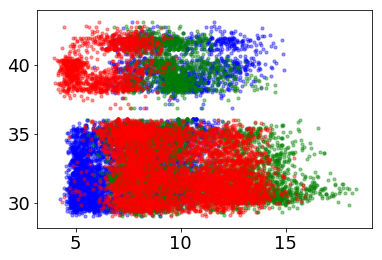

In [158]:
plt.scatter(FenTot[1:,0], FenTot[1:,1], s = 10, alpha = 0.4, color = 'blue')
plt.scatter(ZipTot[1:,0], ZipTot[1:,1], s = 10, alpha = 0.4, color = 'green')
plt.scatter(ExpTot[1:,0], ExpTot[1:,1], s = 10, alpha = 0.4, color = 'red')

In [188]:
X = FenTot[1:, [1,0]]
pca1a = PCA(n_components=2)
pca1a.fit(X)
pca1b = PCA(n_components=1)
pca1b.fit(X)
X_trans = pca1b.transform(X)
X_new = pca1b.inverse_transform(X_trans)

Y = ZipTot[1:, [1,0]]
pca2a = PCA(n_components=2)
pca2a.fit(Y)
pca2b = PCA(n_components=1)
pca2b.fit(Y)
Y_trans = pca2b.transform(Y)
Y_new = pca2b.inverse_transform(Y_trans)

Z = ExpTot[1:, [1,0]]
pca3a = PCA(n_components=2)
pca3a.fit(Z)
pca3b = PCA(n_components=1)
pca3b.fit(Z)
Z_trans = pca3b.transform(Z)
Z_new = pca3b.inverse_transform(Z_trans)

x = FenTot[1:, [2,0]]
pca4a = PCA(n_components=2)
pca4a.fit(x)
pca4b = PCA(n_components=1)
pca4b.fit(x)

x_trans = pca4b.transform(x)
x_new = pca4b.inverse_transform(x_trans)

y = ZipTot[1:, [2,0]]
pca5a = PCA(n_components=2)
pca5a.fit(y)
pca5b = PCA(n_components=1)
pca5b.fit(y)
y_trans = pca5b.transform(y)
y_new = pca5b.inverse_transform(y_trans)

z = ExpTot[1:, [2,0]]
pca6a = PCA(n_components=2)
pca6a.fit(z)
pca6b = PCA(n_components=1)
pca6b.fit(z)
z_trans = pca6b.transform(z)
z_new = pca6b.inverse_transform(z_trans)

In [189]:
## for drawing lines; for some reason the first component doesn't draw itself if you add in the POPC data!

EX = FenTot[1:5050, [1,0]]
PCa1a = PCA(n_components=2)
PCa1a.fit(EX)
PCa1b = PCA(n_components=1)
PCa1b.fit(EX)
EX_trans = PCa1b.transform(EX)
EX_new = PCa1b.inverse_transform(EX_trans)

WY = ZipTot[1:5050, [1,0]]
PCa2a = PCA(n_components=2)
PCa2a.fit(WY)
PCa2b = PCA(n_components=1)
PCa2b.fit(WY)
WY_trans = PCa2b.transform(WY)
WY_new = PCa2b.inverse_transform(WY_trans)

ZD = ExpTot[1:5050, [1,0]]
PCa3a = PCA(n_components=2)
PCa3a.fit(ZD)
PCa3b = PCA(n_components=1)
PCa3b.fit(ZD)
ZD_trans = PCa3b.transform(ZD)
ZD_new = PCa3b.inverse_transform(ZD_trans)

ex = FenTot[1:5050, [2,0]]
PCa4a = PCA(n_components=2)
PCa4a.fit(ex)
PCa4b = PCA(n_components=1)
PCa4b.fit(ex)
ex_trans = PCa4b.transform(ex)
ex_new = PCa4b.inverse_transform(ex_trans)

wy = ZipTot[1:5050, [2,0]]
PCa5a = PCA(n_components=2)
PCa5a.fit(wy)
PCa5b = PCA(n_components=1)
PCa5b.fit(wy)
wy_trans = PCa5b.transform(wy)
wy_new = PCa5b.inverse_transform(wy_trans)

zd = ExpTot[1:5050, [2,0]]
PCa6a = PCA(n_components=2)
PCa6a.fit(zd)
PCa6b = PCA(n_components=1)
PCa6b.fit(zd)
zd_trans = PCa6b.transform(zd)
zd_new = PCa6b.inverse_transform(zd_trans)

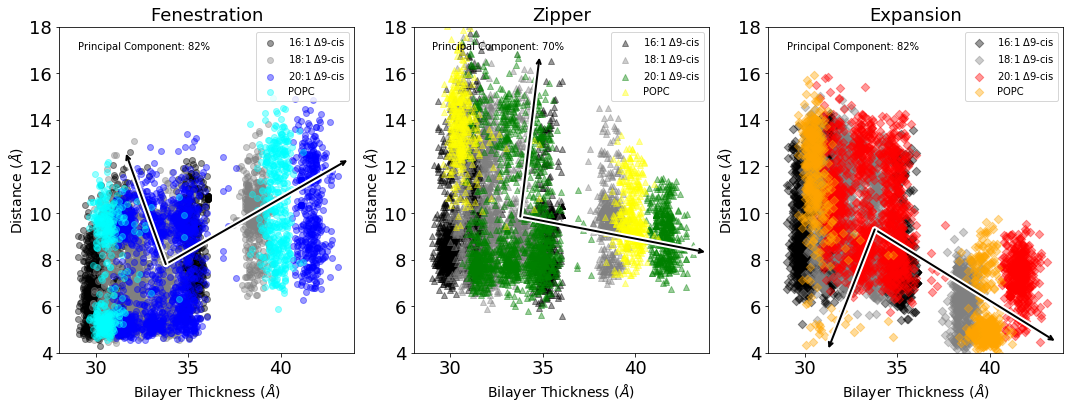

In [178]:
plt.figure(figsize = (18,6))

plt.subplot(131)
plt.scatter(X[0:1414,0], X[0:1414:,1], alpha = 0.4, marker = 'o', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(X[1414:3232,0], X[1414:3232,1], alpha = 0.4, marker = 'o', color = 'grey', label = '18:1 $\Delta$9-cis')
plt.scatter(X[3232:5050,0], X[3232:5050,1], alpha = 0.4, marker = 'o', color = 'blue', label = '20:1 $\Delta$9-cis')
plt.scatter(X[5050:,0], X[5050:,1], alpha = 0.4, marker = 'o', color = 'cyan', label = 'POPC')
for length, vector in zip(PCa1a.explained_variance_, PCa1a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa1a.mean_, PCa1a.mean_ + v)
    draw_vector(PCa1a.mean_, PCa1a.mean_ + v)
#plt.scatter(X_new[:,0], X_new[:,1], alpha = 0.8, marker = 'o', color = 'blue')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
q = [28, 44, 4, 18]
plt.axis(q)
plt.legend(loc='upper right', fontsize = 'medium')
plt.text(29,17, 'Principal Component: 82%', fontsize = 'medium')
plt.title('Fenestration', fontsize = 18)

plt.subplot(132)
plt.scatter(Y[0:1414,0], Y[0:1414,1], alpha = 0.4, color = 'black', marker = '^', label = '16:1 $\Delta$9-cis')
plt.scatter(Y[1414:3232,0], Y[1414:3232,1], alpha = 0.4, color = 'grey', marker = '^', label = '18:1 $\Delta$9-cis')
plt.scatter(Y[3232:5050,0], Y[3232:5050,1], alpha = 0.4, color = 'green', marker = '^', label = '20:1 $\Delta$9-cis')
plt.scatter(Y[5050:,0], Y[5050:,1], alpha = 0.4, color = 'yellow', marker = '^', label = 'POPC')
for length, vector in zip(PCa2a.explained_variance_, PCa2a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa2a.mean_, PCa2a.mean_ + v)
    draw_vector(PCa2a.mean_, PCa2a.mean_ + v)
#plt.scatter(Y_new[:,0], Y_new[:,1], alpha = 0.8, color = 'green', marker = '^')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
plt.axis(q)
plt.legend(loc='upper right', fontsize = 'medium')
plt.text(29,17, 'Principal Component: 70%', fontsize = 'medium')
plt.title('Zipper', fontsize = 18)
    
plt.subplot(133)
plt.scatter(Z[0:1414,0], Z[0:1414,1], alpha = 0.4, marker = 'D', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(Z[1414:3232,0], Z[1414:3232,1], alpha = 0.4, marker = 'D', color = 'grey', label = '18:1 $\Delta$9-cis') 
plt.scatter(Z[3232:5050,0], Z[3232:5050,1], alpha = 0.4, marker = 'D', color = 'red', label = '20:1 $\Delta$9-cis')
plt.scatter(Z[5050:,0], Z[5050:,1], alpha = 0.4, marker = 'D', color = 'orange', label = 'POPC')
for length, vector in zip(PCa3a.explained_variance_, PCa3a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa3a.mean_, PCa3a.mean_ + v)
    draw_vector(PCa3a.mean_, PCa3a.mean_ + v)
#plt.scatter(Z_new[:,0], Z_new[:,1], alpha = 0.8, marker = 'D', color = 'red')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
plt.axis(q)
plt.legend(loc='upper right', fontsize = 'medium')
plt.text(29,17, 'Principal Component: 82%', fontsize = 'medium')
plt.title('Expansion', fontsize = 18)

plt.savefig("alldist-thickness-wpop.png", format='png', dpi=300)
plt.savefig("alldist-thickness-wpop.svg", format='svg', dpi=300)  

In [146]:
pca6a.explained_variance_ratio_

array([0.99895608, 0.00104392])

Text(0.5,1,'Expansion')

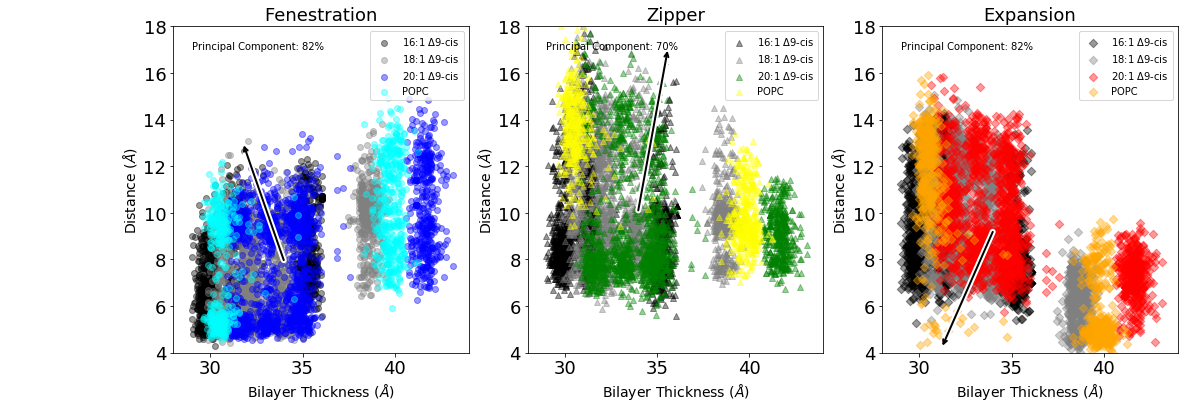

In [204]:
## first component won't plot and I don't know why! should be along axis determined by X_new/Y_new/Z_new etc.

plt.figure(figsize = (18,6))

plt.subplot(131)
plt.scatter(X[0:1414,0], X[0:1414:,1], alpha = 0.4, marker = 'o', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(X[1414:3232,0], X[1414:3232,1], alpha = 0.4, marker = 'o', color = 'grey', label = '18:1 $\Delta$9-cis')
plt.scatter(X[3232:5050,0], X[3232:5050,1], alpha = 0.4, marker = 'o', color = 'blue', label = '20:1 $\Delta$9-cis')
plt.scatter(X[5050:,0], X[5050:,1], alpha = 0.4, marker = 'o', color = 'cyan', label = 'POPC')
for length, vector in zip(pca1a.explained_variance_, pca1a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(pca1a.mean_, pca1a.mean_ + v)
    draw_vector(pca1a.mean_, pca1a.mean_ + v)
#plt.scatter(X_new[:,0], X_new[:,1], alpha = 0.8, marker = 'o', color = 'blue')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
q = [28, 44, 4, 18]
plt.axis(q)
plt.legend(loc='upper right', fontsize = 'medium')
plt.text(29,17, 'Principal Component: 82%', fontsize = 'medium')
plt.title('Fenestration', fontsize = 18)

plt.subplot(132)
plt.scatter(Y[0:1414,0], Y[0:1414,1], alpha = 0.4, color = 'black', marker = '^', label = '16:1 $\Delta$9-cis')
plt.scatter(Y[1414:3232,0], Y[1414:3232,1], alpha = 0.4, color = 'grey', marker = '^', label = '18:1 $\Delta$9-cis')
plt.scatter(Y[3232:5050,0], Y[3232:5050,1], alpha = 0.4, color = 'green', marker = '^', label = '20:1 $\Delta$9-cis')
plt.scatter(Y[5050:,0], Y[5050:,1], alpha = 0.4, color = 'yellow', marker = '^', label = 'POPC')
for length, vector in zip(pca2a.explained_variance_, pca2a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(pca2a.mean_, pca2a.mean_ + v)
    draw_vector(pca2a.mean_, pca2a.mean_ + v)
#plt.scatter(Y_new[:,0], Y_new[:,1], alpha = 0.8, color = 'green', marker = '^')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
plt.axis(q)
plt.legend(loc='upper right', fontsize = 'medium')
plt.text(29,17, 'Principal Component: 70%', fontsize = 'medium')
plt.title('Zipper', fontsize = 18)
    
plt.subplot(133)
plt.scatter(Z[0:1414,0], Z[0:1414,1], alpha = 0.4, marker = 'D', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(Z[1414:3232,0], Z[1414:3232,1], alpha = 0.4, marker = 'D', color = 'grey', label = '18:1 $\Delta$9-cis') 
plt.scatter(Z[3232:5050,0], Z[3232:5050,1], alpha = 0.4, marker = 'D', color = 'red', label = '20:1 $\Delta$9-cis')
plt.scatter(Z[5050:,0], Z[5050:,1], alpha = 0.4, marker = 'D', color = 'orange', label = 'POPC')
for length, vector in zip(pca3a.explained_variance_, pca3a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(pca3a.mean_, pca3a.mean_ + v)
    draw_vector(pca3a.mean_, pca3a.mean_ + v)
#plt.scatter(Z_new[:,0], Z_new[:,1], alpha = 0.8, marker = 'D', color = 'red')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
plt.axis(q)
plt.legend(loc='upper right', fontsize = 'medium')
plt.text(29,17, 'Principal Component: 82%', fontsize = 'medium')
plt.title('Expansion', fontsize = 18)

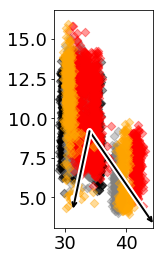

In [207]:
### it appears here but not if you then take away the plt.subplot line???
plt.subplot(133)
plt.scatter(Z[0:1414,0], Z[0:1414,1], alpha = 0.4, marker = 'D', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(Z[1414:3232,0], Z[1414:3232,1], alpha = 0.4, marker = 'D', color = 'grey', label = '18:1 $\Delta$9-cis') 
plt.scatter(Z[3232:5050,0], Z[3232:5050,1], alpha = 0.4, marker = 'D', color = 'red', label = '20:1 $\Delta$9-cis')
plt.scatter(Z[5050:,0], Z[5050:,1], alpha = 0.4, marker = 'D', color = 'orange', label = 'POPC')
for length, vector in zip(pca3a.explained_variance_, pca3a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(pca3a.mean_, pca3a.mean_ + v)
    draw_vector(pca3a.mean_, pca3a.mean_ + v)

In [136]:
X

array([[36.05855179, 10.72733688],
       [35.7100296 , 11.35582924],
       [35.1948967 ,  9.12225056],
       ...,
       [30.34832001,  5.479352  ],
       [30.12006569,  5.43531847],
       [29.93896866,  5.36412048]])

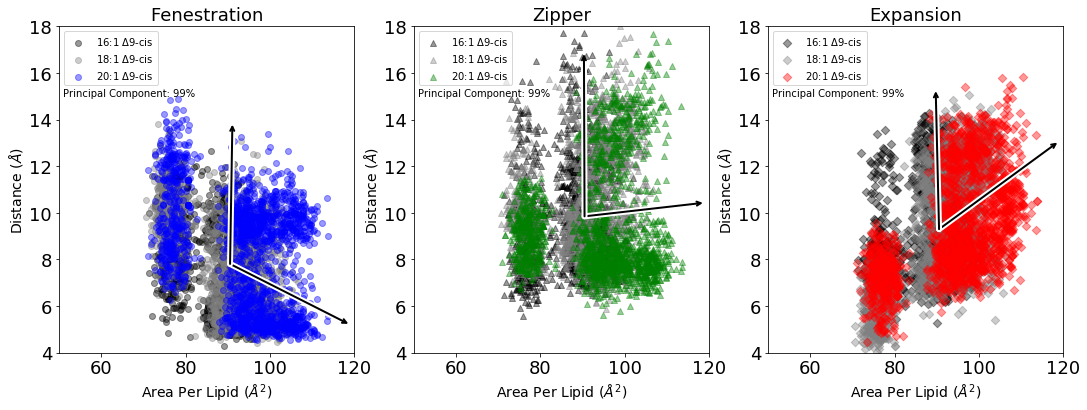

In [196]:
plt.figure(figsize = (18,6))

plt.subplot(131)
plt.scatter(x[0:1414,0], x[0:1414:,1], alpha = 0.4, marker = 'o', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(x[1414:3232,0], x[1414:3232,1], alpha = 0.4, marker = 'o', color = 'grey', label = '18:1 $\Delta$9-cis')
plt.scatter(x[3232:5050,0], x[3232:5050,1], alpha = 0.4, marker = 'o', color = 'blue', label = '20:1 $\Delta$9-cis')
#plt.scatter(x[5050:,0], x[5050:,1], alpha = 0.4, marker = 'o', color = 'cyan', label = 'POPC')
for length, vector in zip(PCa4a.explained_variance_, PCa4a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa4a.mean_, PCa4a.mean_ + v)
    draw_vector(PCa4a.mean_, PCa4a.mean_ + v)
#plt.scatter(x_new[:,0], x_new[:,1], alpha = 0.8, marker = 'o', color = 'blue')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Area Per Lipid ($\AA^2$)', fontsize = 14)
w = [50, 120, 4, 18]
plt.axis(w)
plt.legend(loc='upper left', fontsize = 'medium')
plt.text(51,15.0, 'Principal Component: 99%', fontsize = 'medium')
plt.title('Fenestration', fontsize = 18)

plt.subplot(132)
plt.scatter(y[0:1414,0], y[0:1414,1], alpha = 0.4, color = 'black', marker = '^', label = '16:1 $\Delta$9-cis')
plt.scatter(y[1414:3232,0], y[1414:3232,1], alpha = 0.4, color = 'grey', marker = '^', label = '18:1 $\Delta$9-cis')
plt.scatter(y[3232:5050,0], y[3232:5050,1], alpha = 0.4, color = 'green', marker = '^', label = '20:1 $\Delta$9-cis')
#plt.scatter(y[5050:,0], y[5050:,1], alpha = 0.4, color = 'yellow', marker = '^', label = 'POPC')
for length, vector in zip(PCa5a.explained_variance_, PCa5a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa5a.mean_, PCa5a.mean_ + v)
    draw_vector(PCa5a.mean_, PCa5a.mean_ + v)
#plt.scatter(y_new[:,0], y_new[:,1], alpha = 0.8, color = 'green', marker = '^')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Area Per Lipid ($\AA^2$)', fontsize = 14)
plt.axis(w)
plt.legend(loc='upper left', fontsize = 'medium')
plt.text(51,15.0, 'Principal Component: 99%', fontsize = 'medium')
plt.title('Zipper', fontsize = 18)
    
plt.subplot(133)
plt.scatter(z[0:1414,0], z[0:1414,1], alpha = 0.4, marker = 'D', color = 'black', label = '16:1 $\Delta$9-cis')
plt.scatter(z[1414:3232,0], z[1414:3232,1], alpha = 0.4, marker = 'D', color = 'grey', label = '18:1 $\Delta$9-cis') 
plt.scatter(z[3232:5050,0], z[3232:5050,1], alpha = 0.4, marker = 'D', color = 'red', label = '20:1 $\Delta$9-cis')
#plt.scatter(z[5050:,0], z[5050:,1], alpha = 0.4, marker = 'D', color = 'orange', label = 'POPC') 
for length, vector in zip(PCa6a.explained_variance_, PCa6a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa6a.mean_, PCa6a.mean_ + v)
    draw_vector(PCa6a.mean_, PCa6a.mean_ + v)
#plt.scatter(z_new[:,0], z_new[:,1], alpha = 0.8, marker = 'D', color = 'red')
plt.ylabel('Distance ($\AA$)', fontsize = 14)
plt.xlabel('Area Per Lipid ($\AA^2$)', fontsize = 14)
plt.axis(w)
plt.legend(loc='upper left', fontsize = 'medium')
plt.text(51,15.0, 'Principal Component: 99%', fontsize = 'medium')
plt.title('Expansion', fontsize = 18)

plt.savefig("alldist-apl.png", format='png', dpi=300)
plt.savefig("alldist-apl.svg", format='svg', dpi=300)

In [213]:
pca6a.explained_variance_ratio_

array([0.96316933, 0.03683067])

In [108]:
print(FenTot[1:, [1,0]])

[[36.05855179 10.72733688]
 [35.7100296  11.35582924]
 [35.1948967   9.12225056]
 ...
 [31.63494492  5.05158424]
 [31.32009315  4.99760818]
 [31.78934288  5.10110807]]


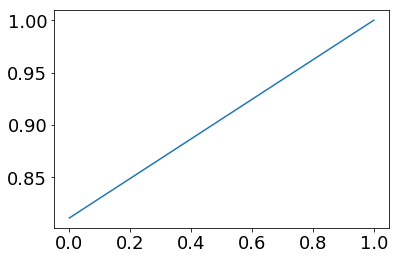

In [107]:
blah = PCA().fit(FenTot[1:, [1,0]])
plt.plot(np.cumsum(blah.explained_variance_ratio_))

In [52]:
H = FenTot
pca = PCA(n_components=3)
pca.fit(H)
pca2 = PCA(n_components=2)
pca2.fit(H)
H_trans = pca2.transform(H)
H_new = pca2.inverse_transform(H_trans)

projected = pca2.fit_transform(H)
print(projected.shape)

(5051, 2)


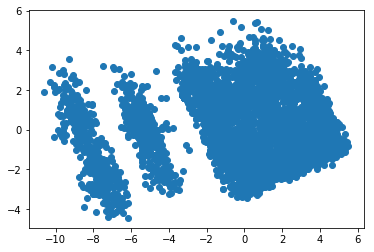

In [54]:
plt.scatter(projected[1:,0], projected[1:,1])

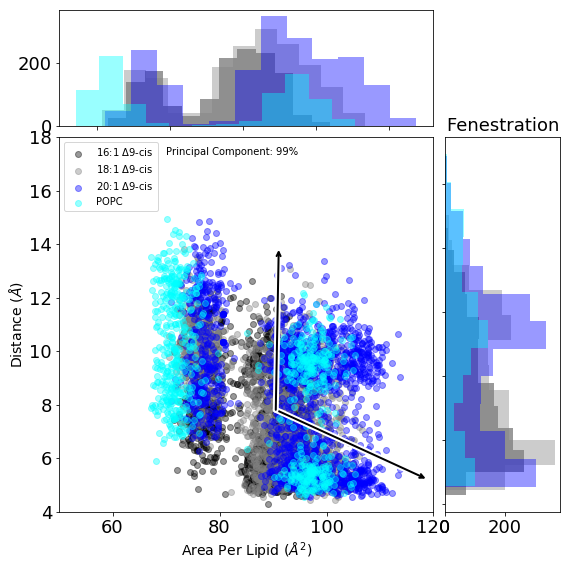

In [203]:
from matplotlib.ticker import NullFormatter

nullfmt = NullFormatter()

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(x[0:1414,0], x[0:1414:,1], alpha = 0.4, marker = 'o', color = 'black', label = '16:1 $\Delta$9-cis')
axScatter.scatter(x[1414:3232,0], x[1414:3232,1], alpha = 0.4, marker = 'o', color = 'grey', label = '18:1 $\Delta$9-cis')
axScatter.scatter(x[3232:5050,0], x[3232:5050,1], alpha = 0.4, marker = 'o', color = 'blue', label = '20:1 $\Delta$9-cis')
axScatter.scatter(x[5050:,0], x[5050:,1], alpha = 0.4, marker = 'o', color = 'cyan', label = 'POPC')
for length, vector in zip(PCa4a.explained_variance_, PCa4a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa4a.mean_, PCa4a.mean_ + v, ax = axScatter)
    draw_vector(PCa4a.mean_, PCa4a.mean_ + v, ax = axScatter)
axScatter.set_ylabel('Distance ($\AA$)', fontsize = 14)
axScatter.set_xlabel('Area Per Lipid ($\AA^2$)', fontsize = 14)
axHistx.hist(x[0:1414,0], bins = 12, color = 'black', alpha = 0.4)
axHisty.hist(x[0:1414:,1], bins = 12, orientation = 'horizontal', color = 'black', alpha = 0.4)
axHistx.hist(x[1414:3232,0], bins = 12, color = 'grey', alpha = 0.4)
axHisty.hist(x[1414:3232,1], bins = 12, orientation = 'horizontal', color = 'grey', alpha = 0.4)
axHistx.hist(x[3232:5050,0], bins = 12, color = 'blue', alpha = 0.4)
axHisty.hist(x[3232:5050,1], bins = 12, orientation = 'horizontal', color = 'blue', alpha = 0.4)
axHistx.hist(x[5050:,0], bins = 12, color = 'cyan', alpha = 0.4)
axHisty.hist(x[5050:,1], bins = 12, orientation = 'horizontal', color = 'cyan', alpha = 0.4)
w = [50, 120, 4, 18]
axScatter.axis(w)
axScatter.legend(loc='upper left', fontsize = 'medium')
plt.text(-930,14.9, 'Principal Component: 99%', fontsize = 'medium')
plt.title('Fenestration', fontsize = 18)

plt.savefig("dist-apl-hists-fen-wpop.png", format='png', dpi=300)
plt.savefig("dist-apl-hists-fen-wpop.svg", format='svg', dpi=300)

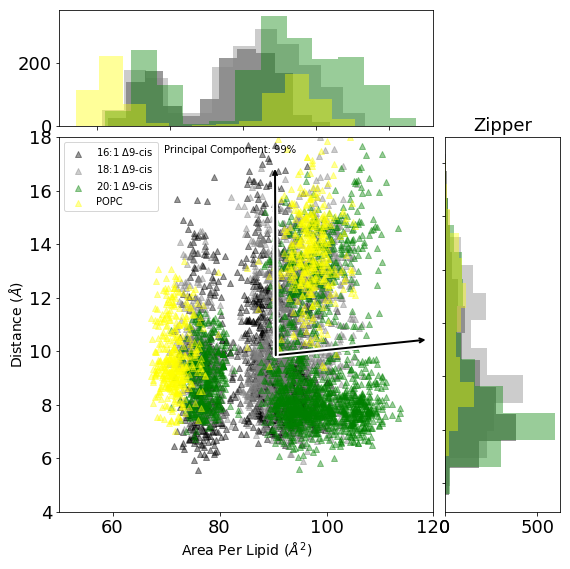

In [214]:
from matplotlib.ticker import NullFormatter

nullfmt = NullFormatter()

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(y[0:1414,0], y[0:1414,1], alpha = 0.4, color = 'black', marker = '^', label = '16:1 $\Delta$9-cis')
axScatter.scatter(y[1414:3232,0], y[1414:3232,1], alpha = 0.4, color = 'grey', marker = '^', label = '18:1 $\Delta$9-cis')
axScatter.scatter(y[3232:5050,0], y[3232:5050,1], alpha = 0.4, color = 'green', marker = '^', label = '20:1 $\Delta$9-cis')
axScatter.scatter(y[5050:,0], y[5050:,1], alpha = 0.4, color = 'yellow', marker = '^', label = 'POPC')
for length, vector in zip(PCa5a.explained_variance_, PCa5a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa5a.mean_, PCa5a.mean_ + v, ax = axScatter)
    draw_vector(PCa5a.mean_, PCa5a.mean_ + v, ax = axScatter)
axScatter.set_ylabel('Distance ($\AA$)', fontsize = 14)
axScatter.set_xlabel('Area Per Lipid ($\AA^2$)', fontsize = 14)
axHistx.hist(y[0:1414,0], bins = 12, color = 'black', alpha = 0.4)
axHisty.hist(y[0:1414:,1], bins = 12, orientation = 'horizontal', color = 'black', alpha = 0.4)
axHistx.hist(y[1414:3232,0], bins = 12, color = 'grey', alpha = 0.4)
axHisty.hist(y[1414:3232,1], bins = 12, orientation = 'horizontal', color = 'grey', alpha = 0.4)
axHistx.hist(y[3232:5050,0], bins = 12, color = 'green', alpha = 0.4)
axHisty.hist(y[3232:5050,1], bins = 12, orientation = 'horizontal', color = 'green', alpha = 0.4)
axHistx.hist(y[5050:,0], bins = 12, color = 'yellow', alpha = 0.4)
axHisty.hist(y[5050:,1], bins = 12, orientation = 'horizontal', color = 'yellow', alpha = 0.4)
w = [50, 120, 4, 18]
axScatter.axis(w)
axScatter.legend(loc='upper left', fontsize = 'medium')
plt.text(-1520,18.4, 'Principal Component: 99%', fontsize = 'medium')
plt.title('Zipper', fontsize = 18)

plt.savefig("dist-apl-hists-zip-wpop.png", format='png', dpi=300)
plt.savefig("dist-apl-hists-zip-wpop.svg", format='svg', dpi=300)

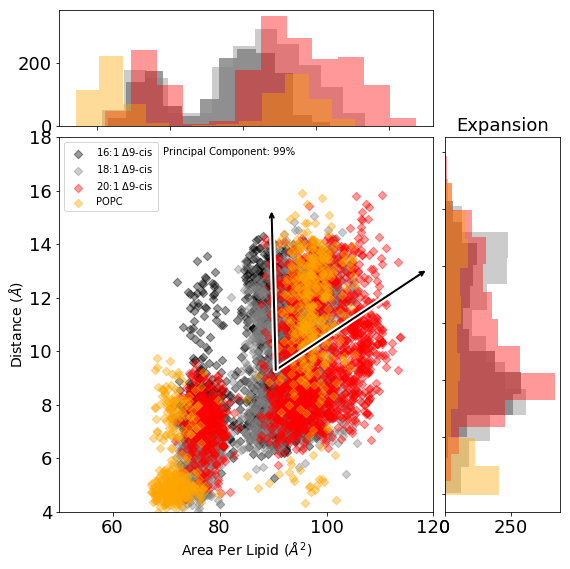

In [201]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(z[0:1414,0], z[0:1414,1], alpha = 0.4, marker = 'D', color = 'black', label = '16:1 $\Delta$9-cis')
axScatter.scatter(z[1414:3232,0], z[1414:3232,1], alpha = 0.4, marker = 'D', color = 'grey', label = '18:1 $\Delta$9-cis') 
axScatter.scatter(z[3232:5050,0], z[3232:5050,1], alpha = 0.4, marker = 'D', color = 'red', label = '20:1 $\Delta$9-cis')
axScatter.scatter(z[5050:,0], z[5050:,1], alpha = 0.4, marker = 'D', color = 'orange', label = 'POPC')
for length, vector in zip(PCa6a.explained_variance_, PCa6a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa6a.mean_, PCa6a.mean_ + v, ax = axScatter)
    draw_vector(PCa6a.mean_, PCa6a.mean_ + v, ax = axScatter)
axScatter.set_ylabel('Distance ($\AA$)', fontsize = 14)
axScatter.set_xlabel('Area Per Lipid ($\AA^2$)', fontsize = 14)
axHistx.hist(z[0:1414,0], bins = 12, color = 'black', alpha = 0.4)
axHisty.hist(z[0:1414:,1], bins = 12, orientation = 'horizontal', color = 'black', alpha = 0.4)
axHistx.hist(z[1414:3232,0], bins = 12, color = 'grey', alpha = 0.4)
axHisty.hist(z[1414:3232,1], bins = 12, orientation = 'horizontal', color = 'grey', alpha = 0.4)
axHistx.hist(z[3232:5050,0], bins = 12, color = 'red', alpha = 0.4)
axHisty.hist(z[3232:5050,1], bins = 12, orientation = 'horizontal', color = 'red', alpha = 0.4)
axHistx.hist(z[5050:,0], bins = 12, color = 'orange', alpha = 0.4)
axHisty.hist(z[5050:,1], bins = 12, orientation = 'horizontal', color = 'orange', alpha = 0.4)
w = [50, 120, 4, 18]
axScatter.axis(w)
axScatter.legend(loc='upper left', fontsize = 'medium')
plt.text(-1070,15.9, 'Principal Component: 99%', fontsize = 'medium')
plt.title('Expansion', fontsize = 18)
plt.savefig("dist-apl-hists-exp-wpop.png", format='png', dpi=300)
plt.savefig("dist-apl-hists-exp-wpop.svg", format='svg', dpi=300)

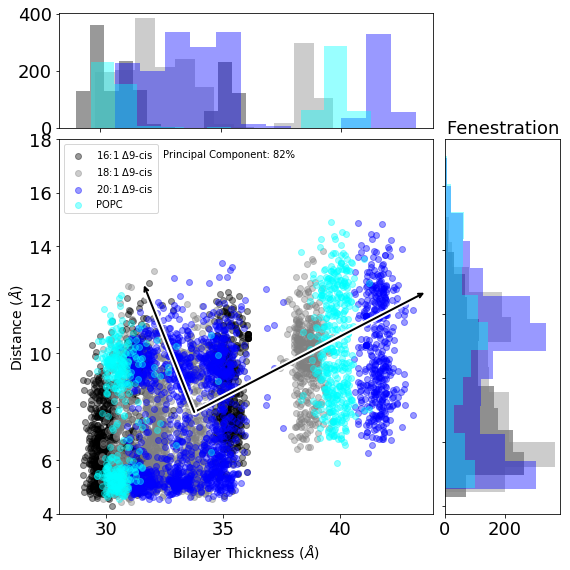

In [153]:
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(X[0:1414,0], X[0:1414:,1], alpha = 0.4, marker = 'o', color = 'black', label = '16:1 $\Delta$9-cis')
axScatter.scatter(X[1414:3232,0], X[1414:3232,1], alpha = 0.4, marker = 'o', color = 'grey', label = '18:1 $\Delta$9-cis')
axScatter.scatter(X[3232:5050,0], X[3232:5050,1], alpha = 0.4, marker = 'o', color = 'blue', label = '20:1 $\Delta$9-cis')
axScatter.scatter(X[5050:,0], X[5050:,1], alpha = 0.4, marker = 'o', color = 'cyan', label = 'POPC')
for length, vector in zip(PCa1a.explained_variance_, PCa1a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa1a.mean_, PCa1a.mean_ + v, ax = axScatter)
    draw_vector(PCa1a.mean_, PCa1a.mean_ + v, ax = axScatter)
axScatter.set_ylabel('Distance ($\AA$)', fontsize = 14)
axScatter.set_xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
axHistx.hist(X[0:1414,0], bins = 12, color = 'black', alpha = 0.4)
axHisty.hist(X[0:1414:,1], bins = 12, orientation = 'horizontal', color = 'black', alpha = 0.4)
axHistx.hist(X[1414:3232,0], bins = 12, color = 'grey', alpha = 0.4)
axHisty.hist(X[1414:3232,1], bins = 12, orientation = 'horizontal', color = 'grey', alpha = 0.4)
axHistx.hist(X[3232:5050,0], bins = 12, color = 'blue', alpha = 0.4)
axHisty.hist(X[3232:5050,1], bins = 12, orientation = 'horizontal', color = 'blue', alpha = 0.4)
axHistx.hist(X[5050:,0], bins = 12, color = 'cyan', alpha = 0.4)
axHisty.hist(X[5050:,1], bins = 12, orientation = 'horizontal', color = 'cyan', alpha = 0.4)
w = [28, 44, 4, 18]
axScatter.axis(w)
axScatter.legend(loc='upper left', fontsize = 'medium')
plt.text(-940,14.9, 'Principal Component: 82%', fontsize = 'medium')
plt.title('Fenestration', fontsize = 18)
plt.savefig("dist-thickness-hists-fen-wpop.png", format='png', dpi=300)
plt.savefig("dist-thickness-hists-fen-wpop.svg", format='svg', dpi=300)

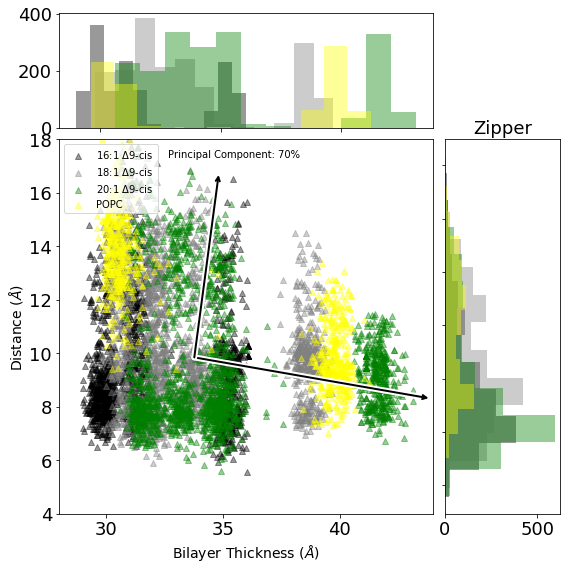

In [154]:
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(Y[0:1414,0], Y[0:1414,1], alpha = 0.4, color = 'black', marker = '^', label = '16:1 $\Delta$9-cis')
axScatter.scatter(Y[1414:3232,0], Y[1414:3232,1], alpha = 0.4, color = 'grey', marker = '^', label = '18:1 $\Delta$9-cis')
axScatter.scatter(Y[3232:5050,0], Y[3232:5050,1], alpha = 0.4, color = 'green', marker = '^', label = '20:1 $\Delta$9-cis')
axScatter.scatter(Y[5050:,0], Y[5050:,1], alpha = 0.4, color = 'yellow', marker = '^', label = 'POPC')
for length, vector in zip(PCa2a.explained_variance_, PCa2a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa2a.mean_, PCa2a.mean_ + v, ax = axScatter)
    draw_vector(PCa2a.mean_, PCa2a.mean_ + v, ax = axScatter)
axScatter.set_ylabel('Distance ($\AA$)', fontsize = 14)
axScatter.set_xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
axHistx.hist(Y[0:1414,0], bins = 12, color = 'black', alpha = 0.4)
axHisty.hist(Y[0:1414:,1], bins = 12, orientation = 'horizontal', color = 'black', alpha = 0.4)
axHistx.hist(Y[1414:3232,0], bins = 12, color = 'grey', alpha = 0.4)
axHisty.hist(Y[1414:3232,1], bins = 12, orientation = 'horizontal', color = 'grey', alpha = 0.4)
axHistx.hist(Y[3232:5050,0], bins = 12, color = 'green', alpha = 0.4)
axHisty.hist(Y[3232:5050,1], bins = 12, orientation = 'horizontal', color = 'green', alpha = 0.4)
axHistx.hist(Y[5050:,0], bins = 12, color = 'yellow', alpha = 0.4)
axHisty.hist(Y[5050:,1], bins = 12, orientation = 'horizontal', color = 'yellow', alpha = 0.4)
w = [28, 44, 4, 18]
axScatter.axis(w)
axScatter.legend(loc='upper left', fontsize = 'medium')
plt.text(-1500,18.3, 'Principal Component: 70%', fontsize = 'medium')
plt.title('Zipper', fontsize = 18)

plt.savefig("dist-thickness-hists-zip-wpop.png", format='png', dpi=300)
plt.savefig("dist-thickness-hists-zip-wpop.svg", format='svg', dpi=300)

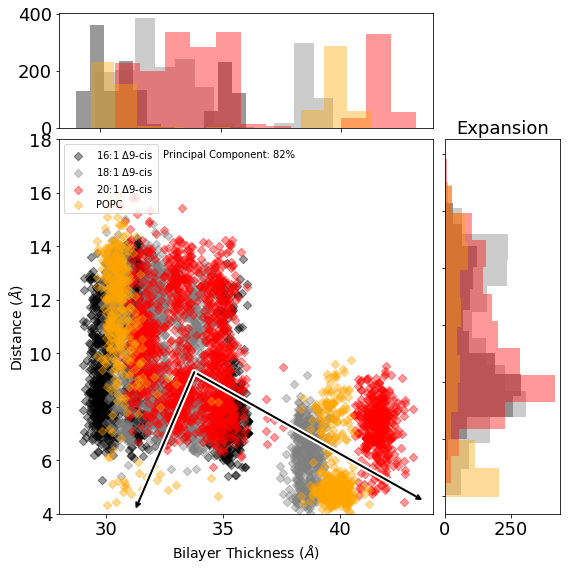

In [157]:
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(Z[0:1414,0], Z[0:1414,1], alpha = 0.4, marker = 'D', color = 'black', label = '16:1 $\Delta$9-cis')
axScatter.scatter(Z[1414:3232,0], Z[1414:3232,1], alpha = 0.4, marker = 'D', color = 'grey', label = '18:1 $\Delta$9-cis') 
axScatter.scatter(Z[3232:5050,0], Z[3232:5050,1], alpha = 0.4, marker = 'D', color = 'red', label = '20:1 $\Delta$9-cis')
axScatter.scatter(Z[5050:,0], Z[5050:,1], alpha = 0.4, marker = 'D', color = 'orange', label = 'POPC')
for length, vector in zip(PCa3a.explained_variance_, PCa3a.components_):
    v = vector * 3 * np.sqrt(length)
    drawvector(PCa3a.mean_, PCa3a.mean_ + v, ax = axScatter)
    draw_vector(PCa3a.mean_, PCa3a.mean_ + v, ax = axScatter)
axScatter.set_ylabel('Distance ($\AA$)', fontsize = 14)
axScatter.set_xlabel('Bilayer Thickness ($\AA$)', fontsize = 14)
axHistx.hist(Z[0:1414,0], bins = 12, color = 'black', alpha = 0.4)
axHisty.hist(Z[0:1414:,1], bins = 12, orientation = 'horizontal', color = 'black', alpha = 0.4)
axHistx.hist(Z[1414:3232,0], bins = 12, color = 'grey', alpha = 0.4)
axHisty.hist(Z[1414:3232,1], bins = 12, orientation = 'horizontal', color = 'grey', alpha = 0.4)
axHistx.hist(Z[3232:5050,0], bins = 12, color = 'red', alpha = 0.4)
axHisty.hist(Z[3232:5050,1], bins = 12, orientation = 'horizontal', color = 'red', alpha = 0.4)
axHistx.hist(Z[5050:,0], bins = 12, color = 'orange', alpha = 0.4)
axHisty.hist(Z[5050:,1], bins = 12, orientation = 'horizontal', color = 'orange', alpha = 0.4)
w = [28, 44, 4, 18]
axScatter.axis(w)
axScatter.legend(loc='upper left', fontsize = 'medium')
plt.text(-1070,15.9, 'Principal Component: 82%', fontsize = 'medium')
plt.title('Expansion', fontsize = 18)
plt.savefig("dist-thickness-hists-exp-wpop.png", format='png', dpi=300)
plt.savefig("dist-thickness-hists-exp-wpop.svg", format='svg', dpi=300)